In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
!pip install -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16057, done.
remote: Total 16057 (delta 0), reused 0 (delta 0), pack-reused 16057
Receiving objects: 100% (16057/16057), 14.66 MiB | 18.35 MiB/s, done.
Resolving deltas: 100% (11028/11028), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 40.0 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.


In [2]:
import os
import numpy as np
import pandas as pd
import ast
import torch
import PIL
from tqdm.auto import tqdm
import shutil as sh
from pathlib import Path
import random

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5016.7/8062.4 GB disk)

OS                  Linux-5.15.133+-x86_64-with-glibc2.35
Environment         Kaggle
Python              3.10.12
Install             pip
RAM                 31.36 GB
CPU                 Intel Xeon 2.00GHz
CUDA                11.8

matplotlib          ✅ 3.7.2>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 10.1.0>=7.1.2
pyyaml              ✅ 6.0>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.7.3>=1.4.1
torch               ✅ 2.0.0>=1.8.0
torchvision         ✅ 0.15.1>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


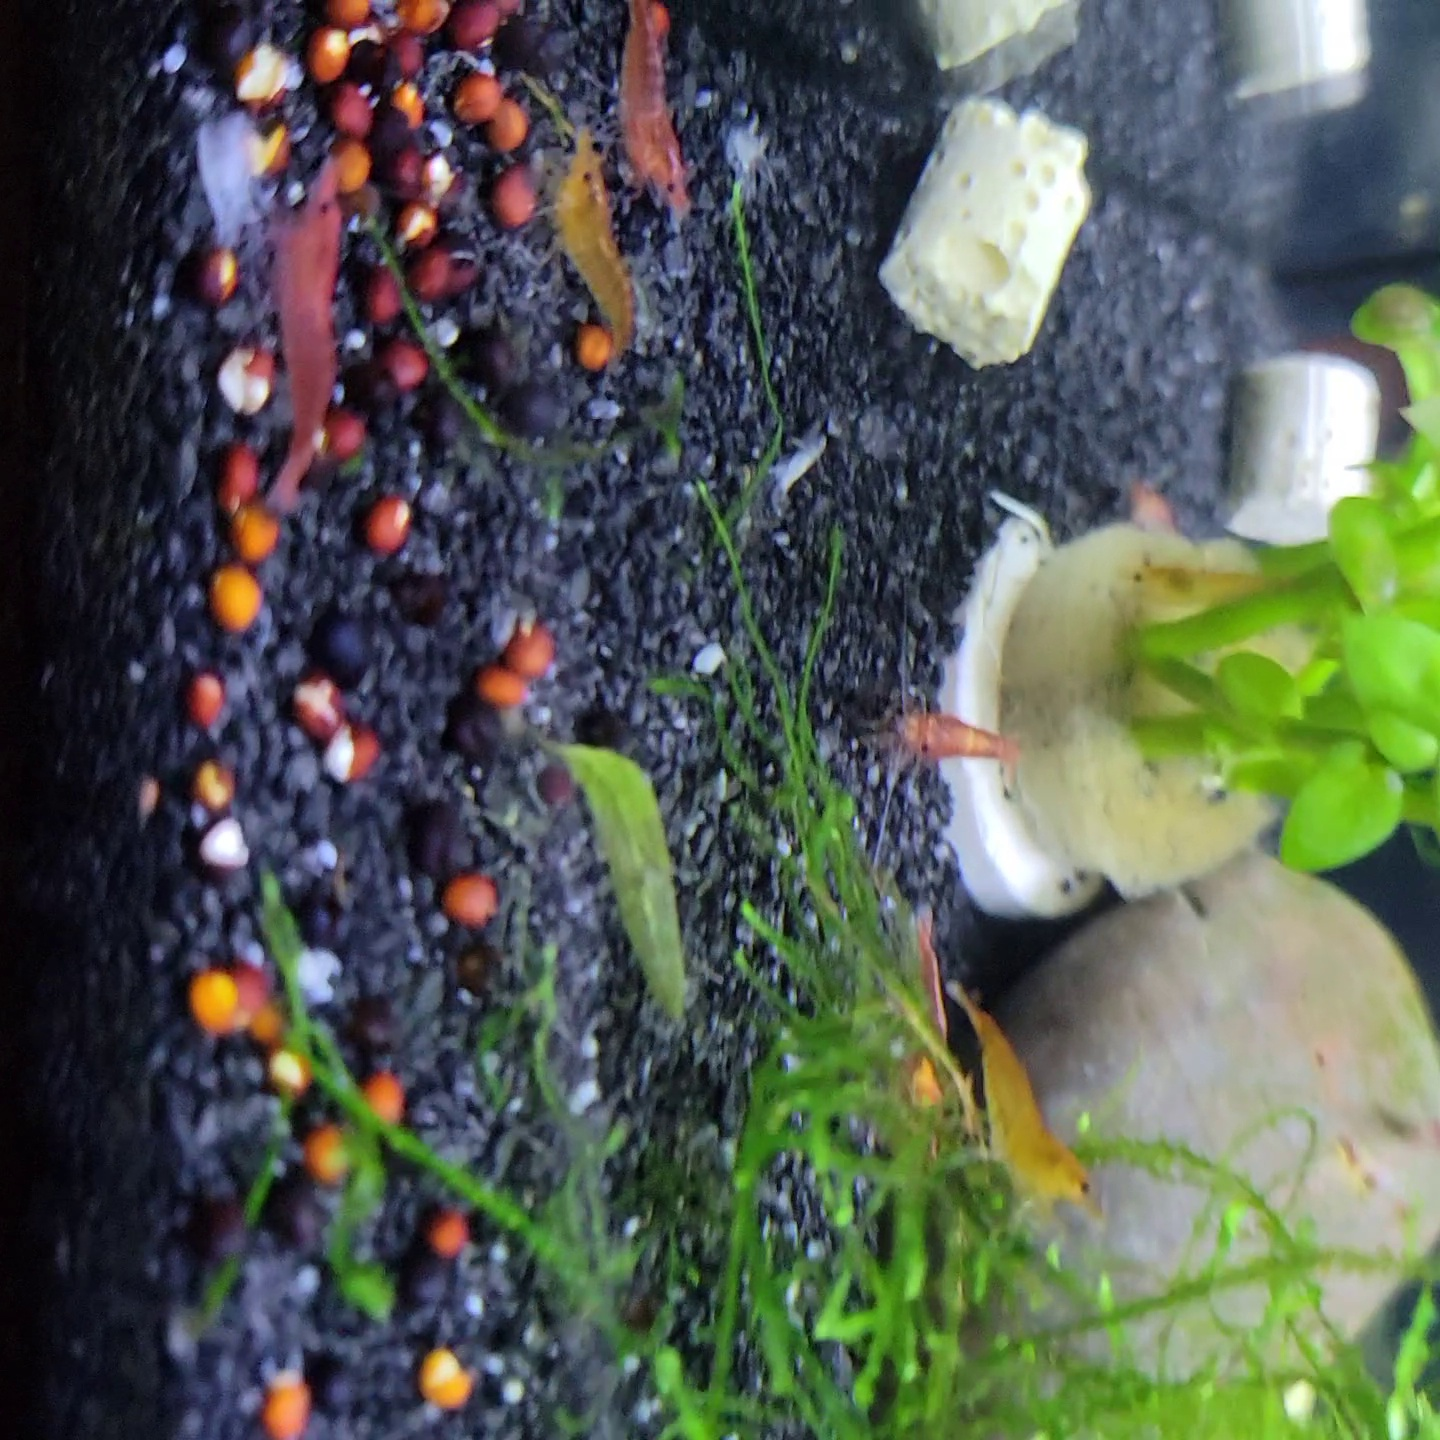

In [4]:
from IPython import display
DATA_DIR = Path('/kaggle/input/shrimp-dataset/project-10-at-2023-09-26-17-38-b449e4f8')
img_list = list(DATA_DIR.glob('images/*.jpg'))
pickone = random.choice(img_list)
display.Image(pickone)

In [5]:
print(f"Found {len(img_list)} images files in {DATA_DIR}")

#img = PIL.Image.open(pickone)
IMAGE_HEIGHT, IMAGE_WIDTH = 1440, 1440
num_channels = 3
print("Image size: {}".format((IMAGE_HEIGHT, IMAGE_WIDTH)))
print("Num channels: {}".format(num_channels))

Found 568 images files in /kaggle/input/shrimp-dataset/project-10-at-2023-09-26-17-38-b449e4f8
Image size: (1440, 1440)
Num channels: 3


In [6]:
import shutil
import random

TILES_DIR = {'train': Path('/kaggle/working/train/images/'),
             'val': Path('/kaggle/working/val/images/')}
for _, folder in TILES_DIR.items():
    if not os.path.isdir(folder):
        os.makedirs(folder)

LABELS_DIR = {'train': Path('/kaggle/working/train/labels/'),
              'val': Path('/kaggle/working/val/labels/')}
for _, folder in LABELS_DIR.items():
    if not os.path.isdir(folder):
        os.makedirs(folder)

for i, img in enumerate(img_list):
    rand = random.randint(0,100)
    
    if(rand < 15):
        shutil.copy(str(img), str(TILES_DIR['val']) + "/image_val_" + str(i) + ".jpg")
        shutil.copy(str(img).replace("images","labels").replace(".jpg", ".txt"), str(LABELS_DIR['val']) + "/image_val_" + str(i) + ".txt")
    else:
        shutil.copy(str(img), str(TILES_DIR['train']) + "/image_train_" + str(i) + ".jpg")
        shutil.copy(str(img).replace("images","labels").replace(".jpg", ".txt"), str(LABELS_DIR['train']) + "/image_train_" + str(i) + ".txt")
    

In [7]:
CONFIG = """
# train and val datasets (image directory or *.txt file with image paths)
train: /kaggle/working/train/
val: /kaggle/working/val/

# number of classes
nc: 1

# class names
names: ['Shrimp']
"""


with open("data.yaml", "w") as f:
    f.write(CONFIG)

In [8]:
!wandb disabled

W&B disabled.


In [9]:
HOME = "/kaggle/working/"
#!yolo task=detect mode=train model=yolov5s.pt data={HOME}/data.yaml epochs=20 imgsz=256
!python3 {HOME}/yolov5/train.py --data {HOME}/data.yaml --img-size 640 --batch-size -1 --epoch 40 --weights yolov5n6.pt

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
train: weights=yolov5n6.pt, cfg=, data=/kaggle/working//data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_dec

In [10]:
#!pip install tensorrt==8.6.1

In [11]:
!python {HOME}/yolov5/export.py --weights yolov5/runs/train/exp/weights/best.pt --include engine --device 0

export: data=yolov5/data/coco128.yaml, weights=['yolov5/runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=0, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['engine']
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 206 layers, 3087256 parameters, 0 gradients, 4.2 GFLOPs

PyTorch: starting from yolov5/runs/train/exp/weights/best.pt with output shape (1, 25500, 6) (6.3 MB)
requirements: Ultralytics requirement ['nvidia-tensorrt'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.9/340.9 MB 241.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  

In [12]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', '/kaggle/working/yolov5/runs/train/exp/weights/best.engine') 
                                                       

/opt/conda/lib/python3.10/site-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-11-8 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Loading /kaggle/working/yolov5/runs/train/exp/weights/best.engine for TensorRT inference...


[11/08/2023-05:50:48] [TRT] [I] [MemUsageChange] Init CUDA: CPU +196, GPU +0, now: CPU 325, GPU 367 (MiB)
[11/08/2023-05:50:48] [TRT] [I] Loaded engine size: 14 MiB
[11/08/2023-05:50:48] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +0, now: CPU 0, GPU 0 (MiB)
[11/08/2023-05:50:48] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +0, now: CPU 0, GPU 0 (MiB)


Adding AutoShape... 


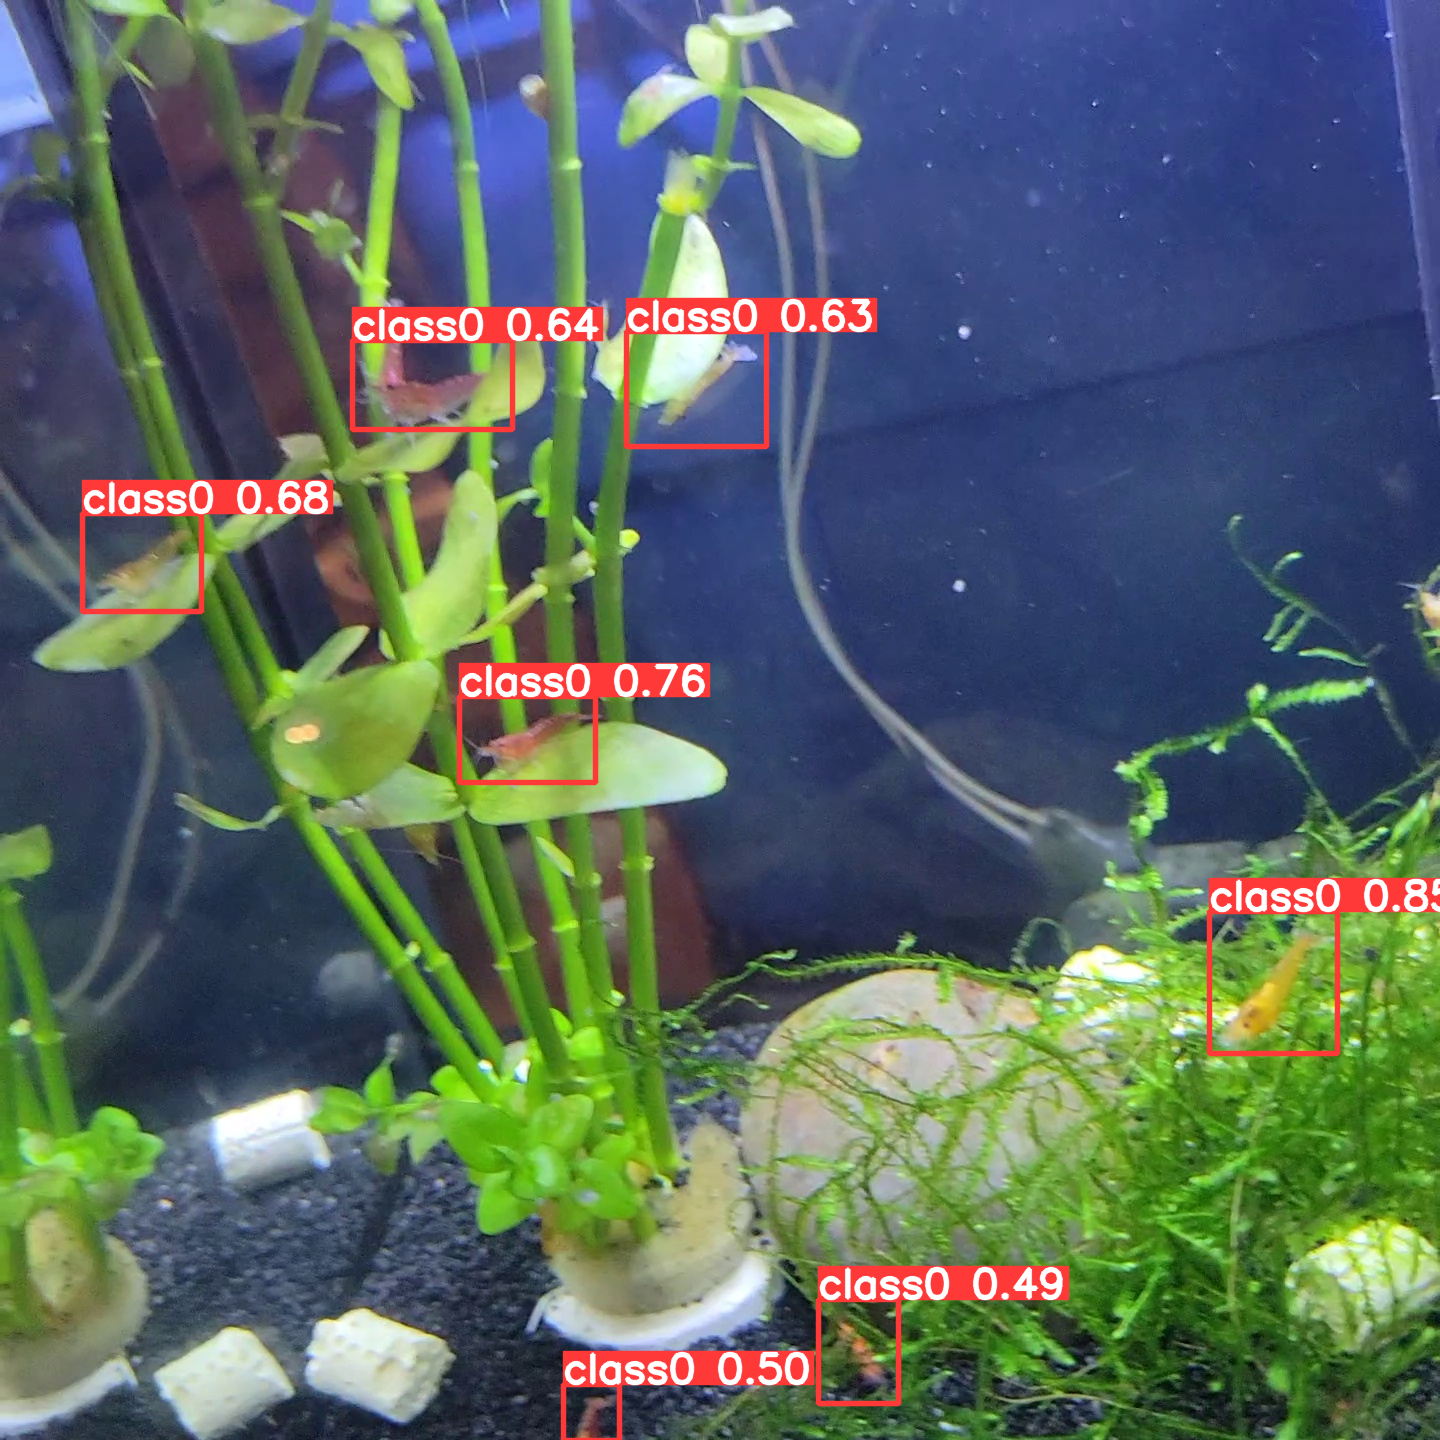

In [13]:
import cv2
# Images
img = cv2.imread('/kaggle/working/train/images/image_train_421.jpg')  # or file, Path, PIL, OpenCV, numpy, list
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Inference
results = model(img)

# Results
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.
